In [255]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [183]:
world2_populations = pd.read_csv('world-country-populations.csv', usecols=['population_in_2023','population_in_2022', 'city', 'country'])
world2_populations

,population_in_2023,population_in_2022,city,country
0,37194105,37274002,Tokyo,Japan
1,32941309,32065760,Delhi,India
2,29210808,28516903,Shanghai,China
3,23209616,22478117,Dhaka,Bangladesh
4,22619736,22429799,Sao Paulo,Brazil
...,...,...,...,...
773,752916,734805,Tongling,China
774,752744,729109,Tirupati,India
775,751679,733917,Wuzhou,China
776,750102,723114,Yuxi,China


In [184]:
# 각 국가의 도시인구를 합쳐서 총 인구 계산
world2_populations = world2_populations.groupby('country').agg({'population_in_2023': 'sum', 'population_in_2022' :'sum'})
world2_populations

,population_in_2023,population_in_2022
country,,
AZ,1651344,1637902
Afghanistan,4588666,4457882
Algeria,3837757,3776261
Angola,12748271,12249422
Argentina,21863392,21669271
...,...,...
Venezuela,12368385,12222794
Vietnam,20193855,19579694
Yemen,6084281,5865816


In [185]:
world_populations = pd.read_csv('best-countries-to-live-in-2024.csv', usecols=['Hdi2021', 'Hdi2020', 'WorldHappiness2022', 'country', 'land_area'])
world_populations

,land_area,country,Hdi2021,Hdi2020,WorldHappiness2022
0,3287590,India,0.633,0.642,3.777
1,9706961,China,0.768,0.764,5.585
2,9372610,United States,0.921,0.920,6.977
3,1904569,Indonesia,0.705,0.709,5.240
4,881912,Pakistan,0.544,0.543,4.516
...,...,...,...,...,...
136,1862,Comoros,0.558,0.562,4.609
137,2586,Luxembourg,0.930,0.924,7.404
138,13812,Montenegro,0.832,0.826,5.547
139,316,Malta,0.918,0.911,6.447


In [186]:
# 데이터 병합 
world_df = pd.merge(world2_populations, world_populations, on='country', how='inner')
world_df

,country,population_in_2023,population_in_2022,land_area,Hdi2021,Hdi2020,WorldHappiness2022
0,Afghanistan,4588666,4457882,652230,0.478,0.483,2.404
1,Algeria,3837757,3776261,2381741,0.745,0.736,5.122
2,Argentina,21863392,21669271,2780400,0.842,0.840,5.967
3,Armenia,1094813,1092028,29743,0.759,0.757,5.399
4,Australia,16345586,16127730,7692024,0.951,0.947,7.162
...,...,...,...,...,...,...,...
109,Uzbekistan,2603243,2573758,447400,0.727,0.721,6.063
110,Vietnam,20193855,19579694,331212,0.703,0.710,5.485
111,Yemen,6084281,5865816,527968,0.455,0.460,4.197
112,Zambia,3944231,3777288,752612,0.565,0.570,3.760


##### 추가로 2023 행복도 점수도 가지고 오기 

In [187]:
WHR_2023 = pd.read_csv('WHR2023.csv', usecols=['Ladder score', 'country'])
WHR_2023 = WHR_2023.rename(columns={'Ladder score':'WorldHappiness2023'})
WHR_2023

,country,WorldHappiness2023
0,Finland,7.804
1,Denmark,7.586
2,Iceland,7.530
3,Israel,7.473
4,Netherlands,7.403
...,...,...
132,Congo (Kinshasa),3.207
133,Zimbabwe,3.204
134,Sierra Leone,3.138
135,Lebanon,2.392


In [188]:
world_df = pd.merge(world_df, WHR_2023, on='country', how='inner')
world_df

,country,population_in_2023,population_in_2022,land_area,Hdi2021,Hdi2020,WorldHappiness2022,WorldHappiness2023
0,Afghanistan,4588666,4457882,652230,0.478,0.483,2.404,1.859
1,Algeria,3837757,3776261,2381741,0.745,0.736,5.122,5.329
2,Argentina,21863392,21669271,2780400,0.842,0.840,5.967,6.024
3,Armenia,1094813,1092028,29743,0.759,0.757,5.399,5.342
4,Australia,16345586,16127730,7692024,0.951,0.947,7.162,7.095
...,...,...,...,...,...,...,...,...
96,Uruguay,1774396,1767243,181034,0.809,0.821,6.474,6.494
97,Uzbekistan,2603243,2573758,447400,0.727,0.721,6.063,6.014
98,Vietnam,20193855,19579694,331212,0.703,0.710,5.485,5.763
99,Zambia,3944231,3777288,752612,0.565,0.570,3.760,3.982


#### 인구밀도 계산해서 추가하기

In [189]:
# 2022년 인구밀도
world_df.insert(3, 'Population_density_2022', (world_df['population_in_2022'] / world_df['land_area']).round(2))

In [190]:
# 2023년 인구밀도
world_df.insert(4, 'Population_density_2023', (world_df['population_in_2023'] / world_df['land_area']).round(2))

In [191]:
world_df

,country,population_in_2023,population_in_2022,Population_density_2022,Population_density_2023,land_area,Hdi2021,Hdi2020,WorldHappiness2022,WorldHappiness2023
0,Afghanistan,4588666,4457882,6.83,7.04,652230,0.478,0.483,2.404,1.859
1,Algeria,3837757,3776261,1.59,1.61,2381741,0.745,0.736,5.122,5.329
2,Argentina,21863392,21669271,7.79,7.86,2780400,0.842,0.840,5.967,6.024
3,Armenia,1094813,1092028,36.72,36.81,29743,0.759,0.757,5.399,5.342
4,Australia,16345586,16127730,2.10,2.13,7692024,0.951,0.947,7.162,7.095
...,...,...,...,...,...,...,...,...,...,...
96,Uruguay,1774396,1767243,9.76,9.80,181034,0.809,0.821,6.474,6.494
97,Uzbekistan,2603243,2573758,5.75,5.82,447400,0.727,0.721,6.063,6.014
98,Vietnam,20193855,19579694,59.12,60.97,331212,0.703,0.710,5.485,5.763
99,Zambia,3944231,3777288,5.02,5.24,752612,0.565,0.570,3.760,3.982


# 밀집도에 따른 행복도 비교 

In [192]:
import geopandas as gpd

In [193]:
# 세계지도 불러오기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Windows\Temp\ipykernel_2092\3445407608.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [194]:
world_merge = world_df[['country', 'WorldHappiness2022','WorldHappiness2023']]
world_merge

,country,WorldHappiness2022,WorldHappiness2023
0,Afghanistan,2.404,1.859
1,Algeria,5.122,5.329
2,Argentina,5.967,6.024
3,Armenia,5.399,5.342
4,Australia,7.162,7.095
...,...,...,...
96,Uruguay,6.474,6.494
97,Uzbekistan,6.063,6.014
98,Vietnam,5.485,5.763
99,Zambia,3.760,3.982


In [195]:
# 병합
world_merge_new = pd.merge(world,world_merge, left_on='name', right_on='country', how='inner')
world_merge_new.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,WorldHappiness2022,WorldHappiness2023
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.702,3.694
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.025,6.961
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,6.234,6.144
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,6.063,6.014
4,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,5.240,5.277


#### 2022년 행복지수

C:\Windows\Temp\ipykernel_2092\632555901.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  world_merge_new.plot(column='WorldHappiness2022', colormap='inferno', legend=True, figsize=(15, 6))


Text(0.5, 1.0, 'WorldHappiness2022 Map')

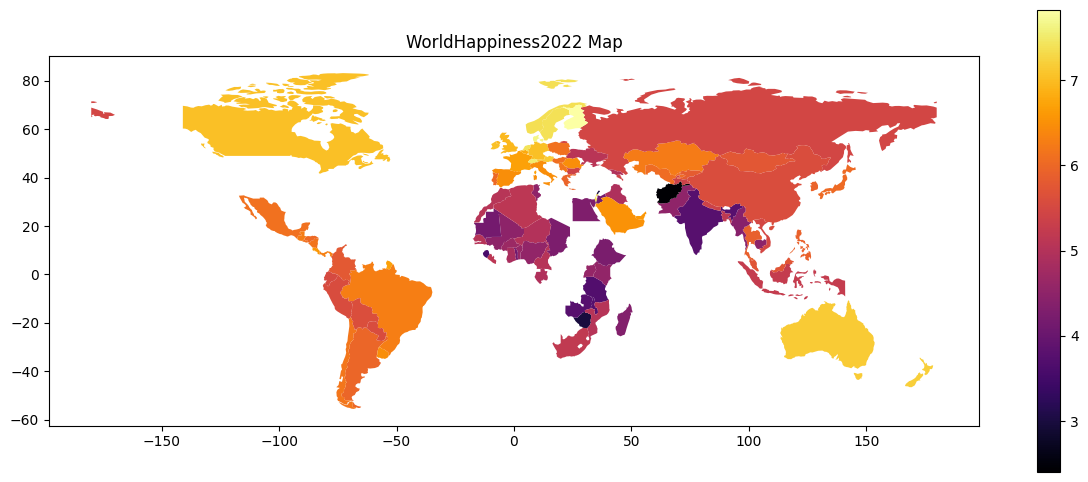

In [196]:
world_merge_new.plot(column='WorldHappiness2022', colormap='inferno', legend=True, figsize=(15, 6))
plt.title('WorldHappiness2022 Map')

#### 2023년 행복지수

C:\Windows\Temp\ipykernel_2092\632555901.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  world_merge_new.plot(column='WorldHappiness2022', colormap='inferno', legend=True, figsize=(15, 6))


Text(0.5, 1.0, 'WorldHappiness2022 Map')

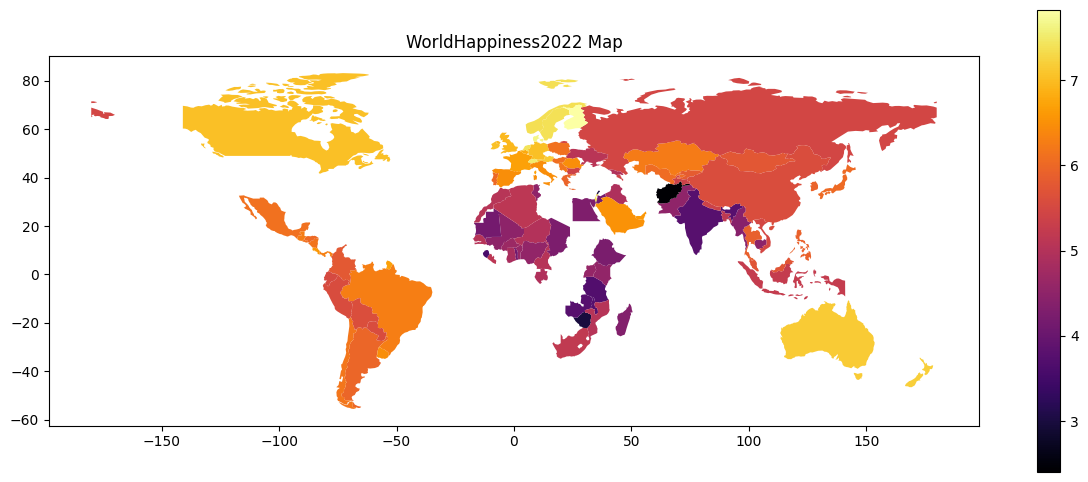

In [197]:
world_merge_new.plot(column='WorldHappiness2022', colormap='inferno', legend=True, figsize=(15, 6))
plt.title('WorldHappiness2022 Map')

#### 인구밀도 상위 10위 나라의 행복도  

In [240]:
top_countries_density = world_df.nlargest(10, 'population_in_2023')
top_countries_density

,country,population_in_2023,population_in_2022,Population_density_2022,Population_density_2023,land_area,Hdi2021,Hdi2020,WorldHappiness2022,WorldHappiness2023
18,China,528629716,515964010,53.15,54.46,9706961,0.768,0.764,5.585,5.818
37,India,254165539,247974646,75.43,77.31,3287590,0.633,0.642,3.777,4.036
10,Brazil,96353158,95415065,11.20,11.31,8515767,0.754,0.758,6.293,6.125
44,Japan,82078367,82224631,217.57,217.18,377930,0.925,0.923,6.039,6.129
56,Mexico,66272293,65355522,33.27,33.74,1964375,0.758,0.756,6.128,6.330
68,Pakistan,50349049,49049693,55.62,57.09,881912,0.544,0.543,4.516,4.555
66,Nigeria,49997954,48147091,52.12,54.12,923768,0.535,0.535,4.552,4.981
38,Indonesia,45694158,44753889,23.50,23.99,1904569,0.705,0.709,5.240,5.277
76,Russia,36936241,36807447,2.15,2.16,17098242,0.829,0.830,5.459,5.661
6,Bangladesh,32376476,31414783,212.88,219.40,147570,0.661,0.655,5.155,4.282


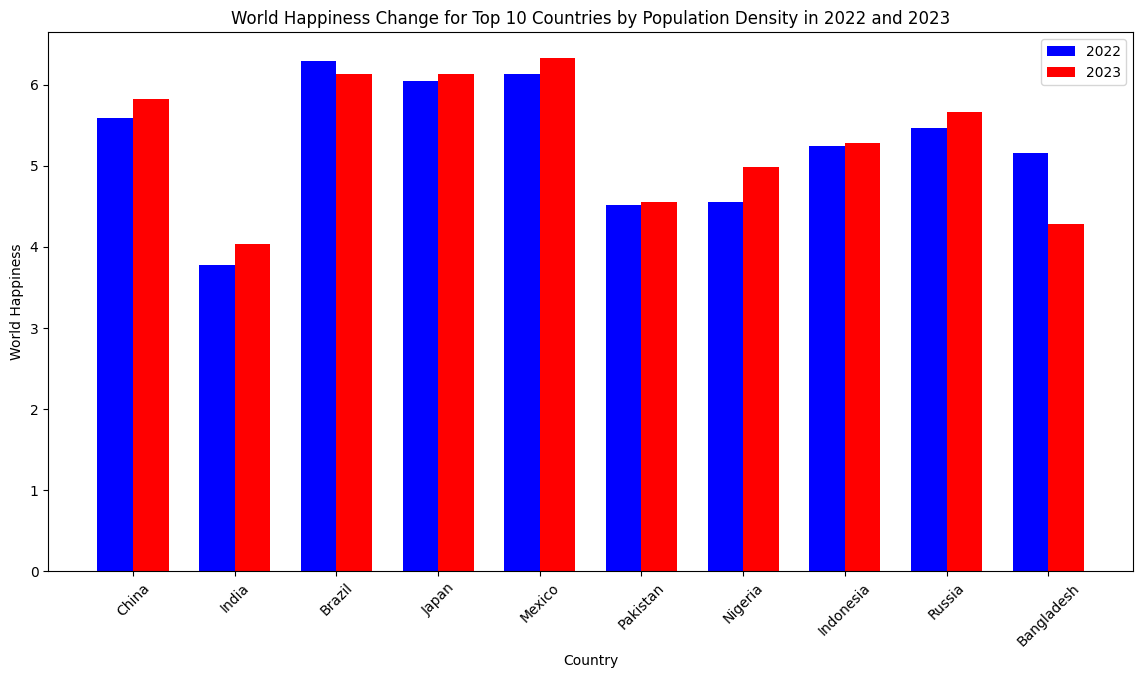

In [241]:
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(top_countries_density))
plt.bar(index, top_countries_density['WorldHappiness2022'], bar_width, color='blue', label='2022')
plt.bar([i + bar_width for i in index], top_countries_density['WorldHappiness2023'], bar_width, color='red', label='2023')

plt.xlabel('Country')
plt.ylabel('World Happiness')
plt.title('World Happiness Change for Top 10 Countries by Population Density in 2022 and 2023')
plt.xticks([i + bar_width / 2 for i in index], top_countries_density['country'], rotation=45)
plt.legend()

In [271]:
top_countries_density['WorldHappiness2022'].mean()

5.2744

In [270]:
top_countries_density['WorldHappiness2023'].mean()

5.3194

#### 인구밀도 하위 10위 나라의 행복도

In [242]:
bottom_countries_density = world_df.nsmallest(10, 'population_in_2023')
bottom_countries_density

,country,population_in_2023,population_in_2022,Population_density_2022,Population_density_2023,land_area,Hdi2021,Hdi2020,WorldHappiness2022,WorldHappiness2023
29,Gabon,869773,856854,3.20,3.25,267668,0.706,0.710,4.958,5.035
87,Tajikistan,986899,962139,6.72,6.90,143100,0.685,0.664,5.377,5.330
30,Georgia,1082245,1080349,15.50,15.53,69700,0.802,0.802,4.973,5.109
67,Norway,1085992,1071062,3.31,3.35,323802,0.961,0.959,7.365,7.315
64,Nicaragua,1094510,1083094,8.31,8.40,130373,0.667,0.654,6.165,6.259
3,Armenia,1094813,1092028,36.72,36.81,29743,0.759,0.757,5.399,5.342
48,Kyrgyzstan,1104742,1082214,5.41,5.53,199951,0.692,0.689,5.828,5.825
25,El Salvador,1116052,1110681,52.79,53.04,21041,0.675,0.672,6.120,6.122
8,Benin,1252890,1188736,10.56,11.12,112622,0.525,0.524,4.623,4.374
40,Ireland,1270172,1255963,17.87,18.07,70273,0.945,0.943,7.041,6.911


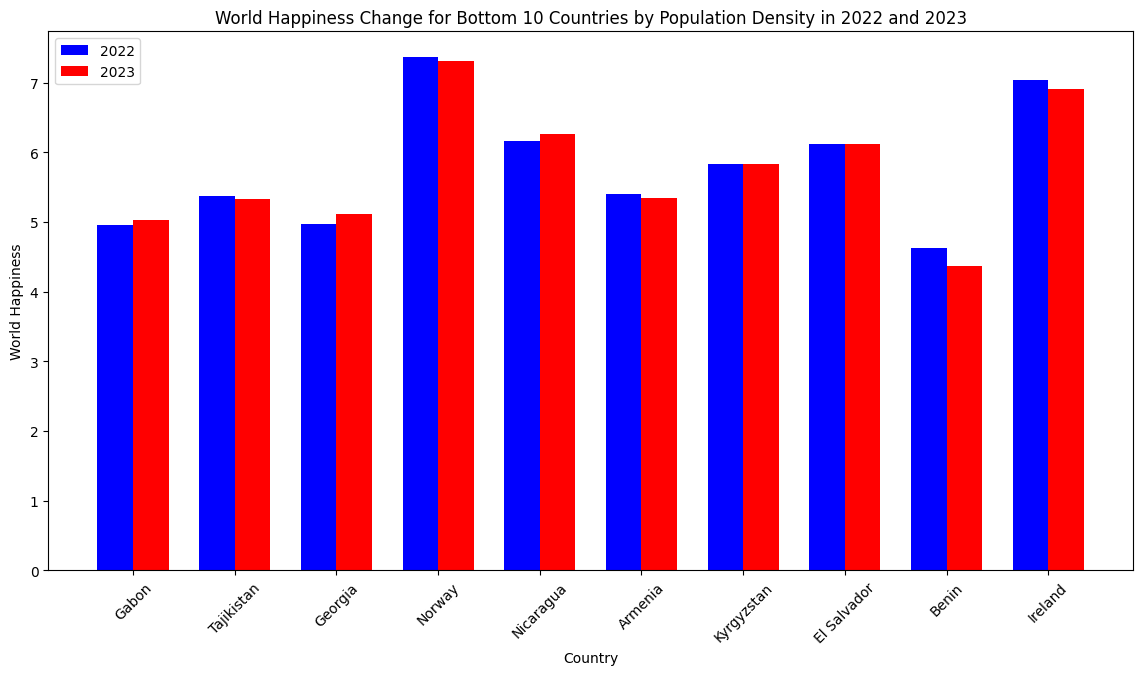

In [243]:
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(bottom_countries_density))

plt.bar(index, bottom_countries_density['WorldHappiness2022'], bar_width, color='blue', label='2022')
plt.bar([i + bar_width for i in index], bottom_countries_density['WorldHappiness2023'], bar_width, color='red', label='2023')

plt.xlabel('Country')
plt.ylabel('World Happiness')
plt.title('World Happiness Change for Bottom 10 Countries by Population Density in 2022 and 2023')
plt.xticks([i + bar_width / 2 for i in index], bottom_countries_density['country'], rotation=45)
plt.legend()

In [248]:
bottom_countries_density['WorldHappiness2023'].mean()

5.762200000000001

In [249]:
bottom_countries_density['WorldHappiness2022'].mean()

5.7849

##### 상관관계 분석

In [257]:
# 인구밀집도와 행복도의 상관관계 분석 
# 상관관계가 거의 없음
co_density_happy = world_df['population_in_2023'].corr(world_df['Population_density_2023'])
co_density_happy

-0.01119805881230491

### Hdi 분석

In [251]:
world_merge_Hdi = world_df[['country', 'Hdi2021','Hdi2020']]
world_merge_Hdi

,country,Hdi2021,Hdi2020
0,Afghanistan,0.478,0.483
1,Algeria,0.745,0.736
2,Argentina,0.842,0.840
3,Armenia,0.759,0.757
4,Australia,0.951,0.947
...,...,...,...
96,Uruguay,0.809,0.821
97,Uzbekistan,0.727,0.721
98,Vietnam,0.703,0.710
99,Zambia,0.565,0.570


In [252]:
world_merge_Hdi_new= pd.merge(world,world_merge_Hdi, left_on='name', right_on='country', how='inner')
world_merge_Hdi_new.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,Hdi2021,Hdi2020
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,0.549,0.548
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.936,0.931
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,0.811,0.814
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,0.727,0.721
4,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,0.705,0.709


##### Hdi_2020

C:\Windows\Temp\ipykernel_2092\3038110337.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  world_merge_Hdi_new.plot(column='Hdi2020', colormap='inferno', legend=True, figsize=(15, 6))


Text(0.5, 1.0, 'Hdi2020 Map')

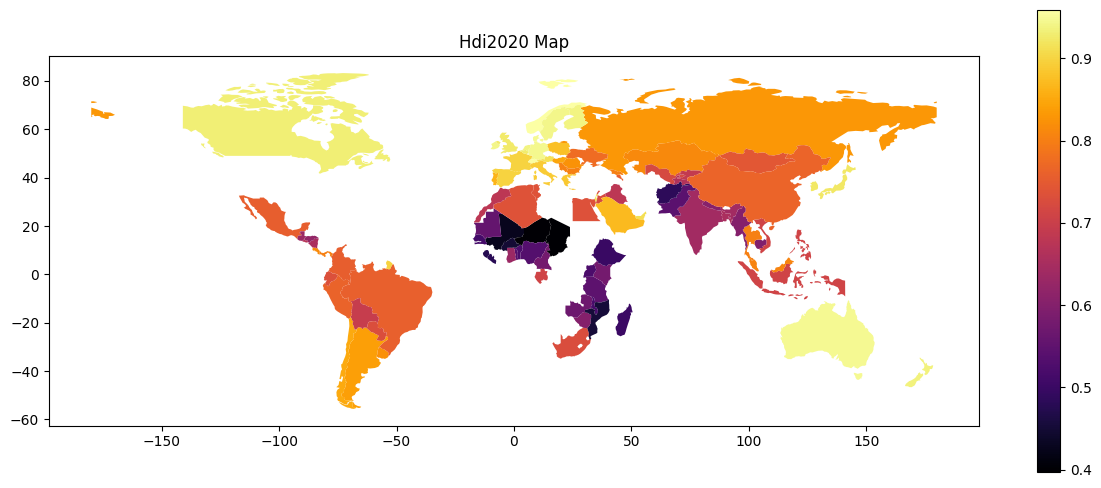

In [253]:
world_merge_Hdi_new.plot(column='Hdi2020', colormap='inferno', legend=True, figsize=(15, 6))
plt.title('Hdi2020 Map')

#### Hdi_2021

C:\Windows\Temp\ipykernel_2092\332810791.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  world_merge_Hdi_new.plot(column='Hdi2021', colormap='inferno', legend=True, figsize=(15, 6))


Text(0.5, 1.0, 'Hdi2020 Map')

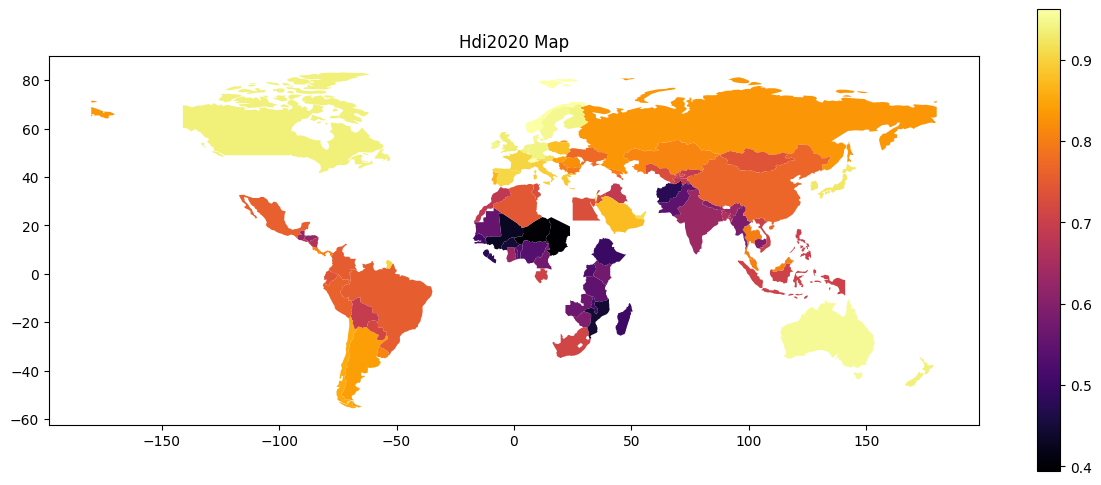

In [254]:
world_merge_Hdi_new.plot(column='Hdi2021', colormap='inferno', legend=True, figsize=(15, 6))
plt.title('Hdi2020 Map')

### 인구밀집도 상위 10의 나라 Hdi 분석

In [263]:
top_countries_Hdi = world_df.nlargest(10, 'Hdi2020')
top_countries_Hdi

,country,population_in_2023,population_in_2022,Population_density_2022,Population_density_2023,land_area,Hdi2021,Hdi2020,WorldHappiness2022,WorldHappiness2023
67,Norway,1085992,1071062,3.31,3.35,323802,0.961,0.959,7.365,7.315
86,Switzerland,1431538,1419621,34.39,34.68,41284,0.962,0.956,7.512,7.240
4,Australia,16345586,16127730,2.10,2.13,7692024,0.951,0.947,7.162,7.095
21,Denmark,1381005,1370131,31.79,32.05,43094,0.948,0.947,7.636,7.586
31,Germany,8878026,8853272,24.79,24.86,357114,0.942,0.944,7.034,6.892
40,Ireland,1270172,1255963,17.87,18.07,70273,0.945,0.943,7.041,6.911
85,Sweden,1700066,1679050,3.73,3.78,450295,0.947,0.942,7.384,7.395
62,Netherlands,2192037,2180573,52.10,52.38,41850,0.941,0.939,7.415,7.403
81,Singapore,6080859,6039577,8506.45,8564.59,710,0.939,0.939,6.480,6.587
27,Finland,1337786,1327762,3.92,3.95,338424,0.940,0.938,7.821,7.804


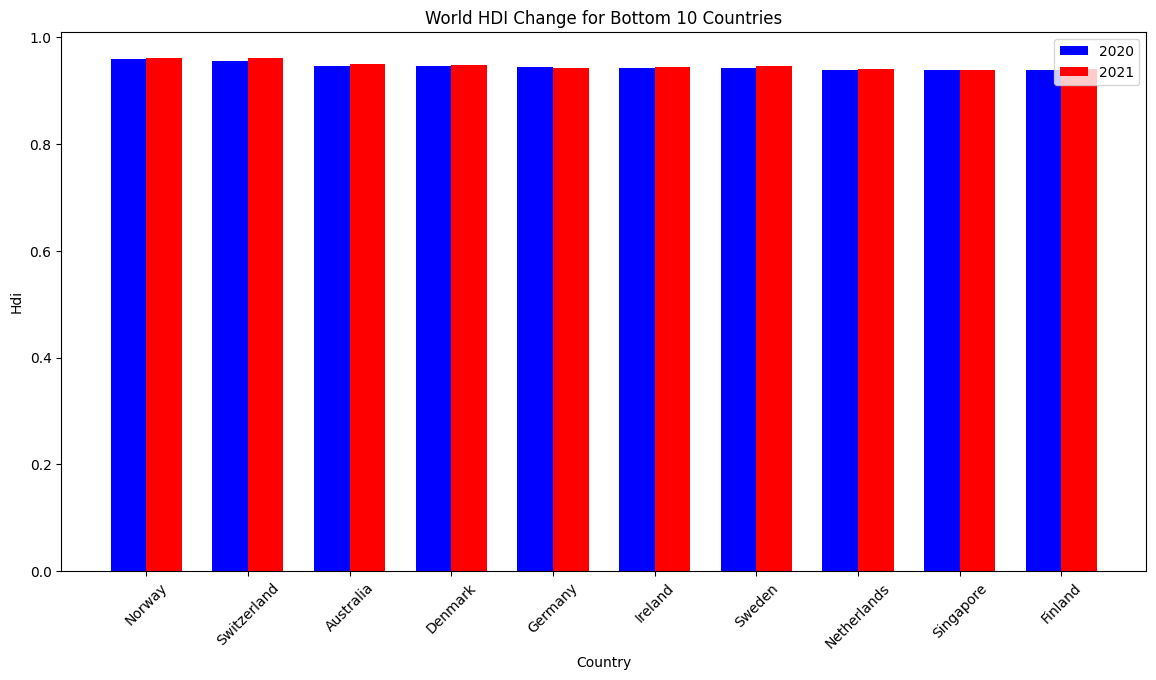

In [275]:
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(top_countries_Hdi))
plt.bar(index, top_countries_Hdi['Hdi2020'], bar_width, color='blue', label='2020')
plt.bar([i + bar_width for i in index], top_countries_Hdi['Hdi2021'], bar_width, color='red', label='2021')

plt.xlabel('Country')
plt.ylabel('Hdi')
plt.title('World HDI Change for Bottom 10 Countries')
plt.xticks([i + bar_width / 2 for i in index], top_countries_Hdi['country'], rotation=45)
plt.legend()

In [273]:
top_countries_Hdi['Hdi2021'].mean()

0.9475999999999999

In [272]:
top_countries_Hdi['Hdi2020'].mean()

0.9454

### 인구밀집도 하위 10의 나라 Hdi 분석

In [264]:
bottom_countries_Hdi = world_df.nsmallest(10, 'Hdi2021')
bottom_countries_Hdi

,country,population_in_2023,population_in_2022,Population_density_2022,Population_density_2023,land_area,Hdi2021,Hdi2020,WorldHappiness2022,WorldHappiness2023
16,Chad,1592324,1532588,1.19,1.24,1284000,0.394,0.397,4.251,4.397
65,Niger,1437233,1383909,1.09,1.13,1267000,0.400,0.401,5.003,4.501
54,Mali,2929373,2816943,2.27,2.36,1240192,0.428,0.427,4.479,4.198
59,Mozambique,3984520,3863304,4.82,4.97,801590,0.446,0.453,5.048,4.954
12,Burkina Faso,4332569,4130097,15.13,15.87,272967,0.449,0.449,4.670,4.638
80,Sierra Leone,1309168,1272145,17.73,18.25,71740,0.477,0.475,3.574,3.138
0,Afghanistan,4588666,4457882,6.83,7.04,652230,0.478,0.483,2.404,1.859
50,Liberia,1678020,1622582,14.57,15.07,111369,0.481,0.480,5.122,4.042
26,Ethiopia,5460591,5227794,4.73,4.94,1104300,0.498,0.498,4.241,4.091
51,Madagascar,3872264,3699900,6.30,6.60,587041,0.501,0.501,4.339,4.019


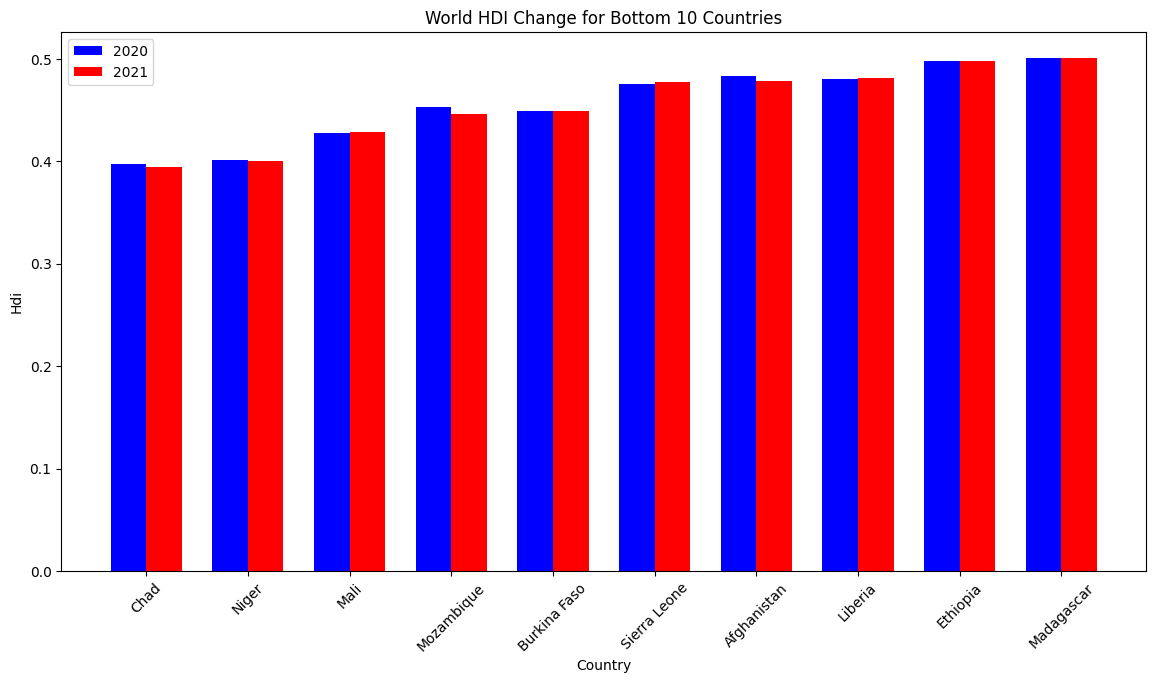

In [274]:
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(bottom_countries_Hdi))
plt.bar(index, bottom_countries_Hdi['Hdi2020'], bar_width, color='blue', label='2020')
plt.bar([i + bar_width for i in index], bottom_countries_Hdi['Hdi2021'], bar_width, color='red', label='2021')

plt.xlabel('Country')
plt.ylabel('Hdi')
plt.title('World HDI Change for Bottom 10 Countries')
plt.xticks([i + bar_width / 2 for i in index], bottom_countries_Hdi['country'], rotation=45)
plt.legend()

In [276]:
bottom_countries_Hdi['Hdi2021'].mean()

0.45520000000000005

In [277]:
bottom_countries_Hdi['Hdi2020'].mean()

0.45640000000000003

##### 상관관계 분석

In [285]:
# 인구밀집도와 Hdi의 상관관계 분석 
# 매우 강한 양의 상관관계를 보임
co_density_Hid = world_df['Hdi2020'].corr(world_df['Hdi2020'])
co_density_Hid

1.0

In [286]:
co_density_Hid = world_df['Hdi2021'].corr(world_df['Hdi2021'])
co_density_Hid

1.0

Text(0, 0.5, 'Hdi2020')

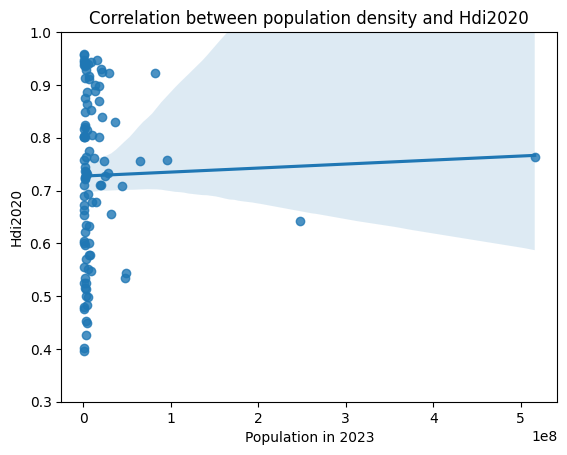

In [294]:
# 산점도로도 확인
import seaborn as sns
sns.regplot(x='population_in_2022', y='Hdi2020', data=world_df)
plt.ylim(0.3,1)
plt.title('Correlation between population density and Hdi2020')
plt.xlabel('Population in 2023')
plt.ylabel('Hdi2020')

Text(0, 0.5, 'Hdi2021')

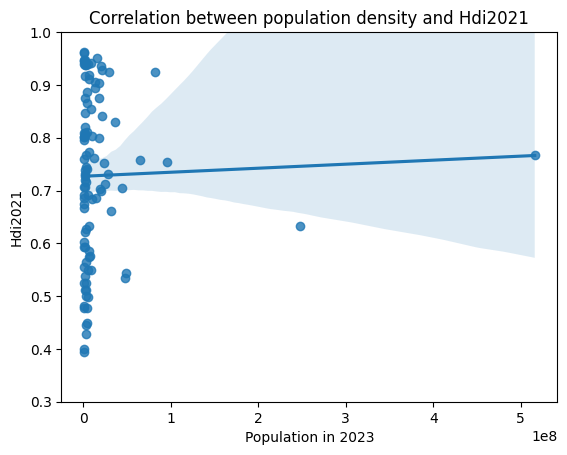

In [301]:
import seaborn as sns
sns.regplot(x='population_in_2022', y='Hdi2021', data=world_df)
plt.ylim(0.3,1)
plt.title('Correlation between population density and Hdi2021')
plt.xlabel('Population in 2023')
plt.ylabel('Hdi2021')

- 양의 상관관계
: 인구밀집도와 인간개발지수(HDI) 사이에는 양의 상관관계가 있을 것으로 보임
: 즉, 인구수가 많은 국가들은 상대적으로 높은 HDI 값을 가질 가능성이 있음
: 이는 인구수가 많은 국가들이 더 발전된 인프라와 서비스를 제공할 수 있으며, 이것이 더 높은 인간개발지수와 연결될 수 있음

- 데이터의 분산
: 추세선 주변의 신뢰구간이 넓게 퍼져 있는 것으로 보아, 인구수와 HDI 사이의 관계가 모든 국가에 대해 일관되지 않을 수 있음을 나타냄

- 데이터의 해석
: 인구밀집도와 HDI 사이의 인과관계를 단정 지을 수 없음
: 양의 상관관계가 있더라도, 인구밀집도가 HDI를 결정하는 유일한 요인이 아니며, 두 변수 사이의 관계는 복잡한 다른 요인들에 의해 영향을 받을 수 있음

### 행복도와 Hdi의 상관관계 분석 

In [293]:
# 강한 양의 상관관계
Hid_happy = world_df['WorldHappiness2022'].corr(world_df['Hdi2020'])
Hid_happy

0.8014498538813117

Text(0, 0.5, 'Hdi2020')

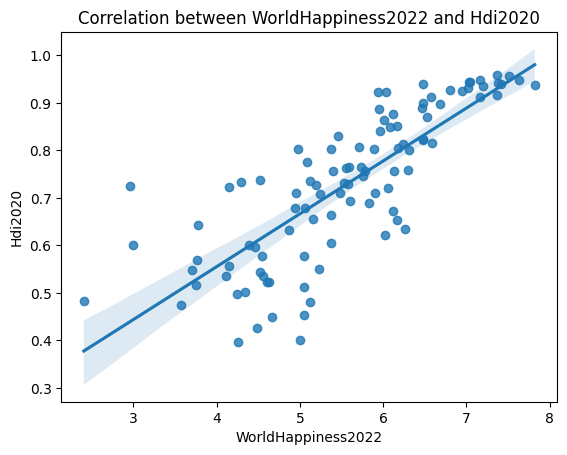

In [298]:
import seaborn as sns
sns.regplot(x='WorldHappiness2022', y='Hdi2020', data=world_df)
plt.title('Correlation between WorldHappiness2022 and Hdi2020')
plt.xlabel('WorldHappiness2022')
plt.ylabel('Hdi2020')

Text(0, 0.5, 'Hdi2020')

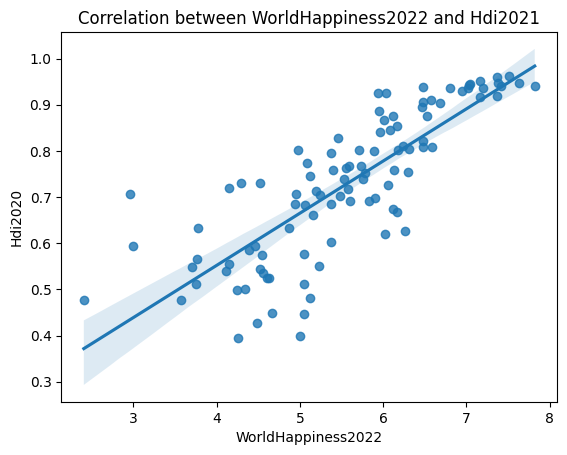

In [299]:
import seaborn as sns
sns.regplot(x='WorldHappiness2022', y='Hdi2021', data=world_df)
plt.title('Correlation between WorldHappiness2022 and Hdi2021')
plt.xlabel('WorldHappiness2022')
plt.ylabel('Hdi2020')

- 양의 상관관계
: 추세선이 오르막이며, 세계 행복 지수가 높을수록 인간개발지수(HDI)도 높아지는 경향이 있음
: 이는 더 행복한 나라가 더 높은 인간 개발 수준을 가질 가능성이 있음을 시사

- 데이터 분포
: 데이터 포인트들이 추세선 주변에 밀접하게 모여 있어, 두 변수 간의 강한 선형 관계가 있음을 나타냄
: 통계적으로 유의미한 상관관계를 시사

- 신뢰구간
: 신뢰구간이 좁은 것으로 보아, 예측된 추세선에 대한 신뢰도가 높음